# Xi Yang
# ANLY 590 Hw #1


## Problem No.1

### Import needed packages and prepare the dataset.

In [1]:
# Import needed packages
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from itertools import compress

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline 

In [2]:
# Open and read in hitters dataset
with open('Hitters.csv', 'r') as input_data:
    df_hitters = pd.read_csv(input_data , sep=',', header = 0)

# Generate a column name list
col_list = list(df_hitters.columns)

# Run through all columns
for i in col_list:
    # Delete string columns and left only numerical columns
    if type(df_hitters.loc[0,i]) == str:
        df_hitters.drop(i, axis = 1, inplace = True)

# Drop rows with na values
df_hitters.dropna(axis = 0, inplace = True)

# Separate predictor and response
df_x = df_hitters.drop(['Salary'], axis = 1)
df_y = df_hitters.loc[:, 'Salary']

# Normalize the dataset
scaler = StandardScaler()
scaler.fit(df_x)
df_x = pd.DataFrame(scaler.transform(df_x), columns=df_x.columns)

### 1.1 Lasso Regression

### Using lasso_path model of sklearn to generate Lasso regression results under a wide range of $\alpha$.

### Lasso trajectory plot is also generated in the code cell below for Lasso regression visualization.

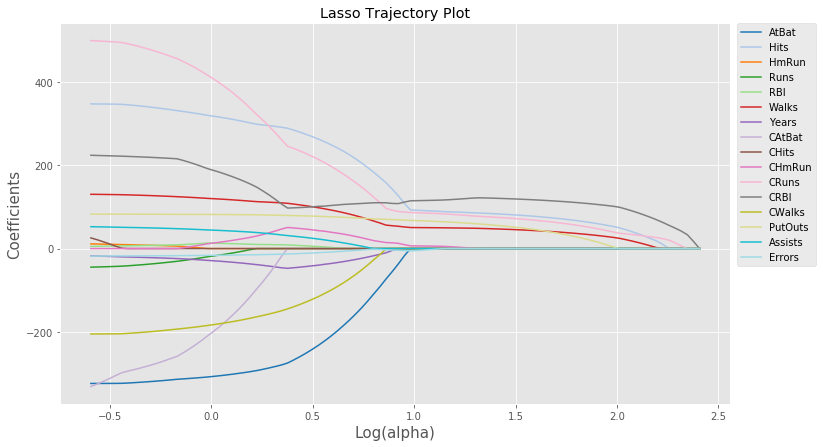

In [3]:
# Using Lasso path Lasso regression under a wide range of alpha
alphas_lasso, coefs_lasso, _ = linear_model.lasso_path(np.array(df_x), np.array(df_y), fit_intercept=True)

# Set up basic parameters of Lasso trajectory plot
plt.style.use('ggplot')
matplotlib.rc('xtick',labelsize=10)
matplotlib.rc('ytick',labelsize=10)
plt.subplots(figsize=(12,7))

# Set up color list
colors = plt.cm.tab20(np.linspace(0,1,len(coefs_lasso)))

# Calculate log_alpha for plotting
log_alphas_lasso = np.log10(alphas_lasso)

# Initialize a empty line list and a column name list
lines = []
pred_names = list(df_x.columns)

# Iterate through all predictors
for i in range(len(coefs_lasso)):
    coefs_l = coefs_lasso[i]
    line = plt.plot(log_alphas_lasso, coefs_l, c = colors[i], label = pred_names[i])
    lines.append(line)

# Set up plot labels and title
plt.xlabel('Log(alpha)', fontsize = 15)
plt.ylabel('Coefficients', fontsize = 15)
plt.title('Lasso Trajectory Plot')
    
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

### Print out last 3 predictors of Lasso when using larger alpha.

In [4]:
# Find out last 3 predictors of Lasso
# Iterate through all alpha values
for j in range(len(coefs_lasso[0, :])):
    temp_coefs = coefs_lasso[:, j]
    
    # Generate a boolean filter list of whether a coefficient is 0
    filter_list = [item != 0 for item in temp_coefs]
    
    # If there are 3 non-zero coefficients, record coefficients
    if sum(filter_list) == 3:
        last_3 = list(compress(pred_names, filter_list))
    
print('Last 3 variables in the Lasso model are:\n', last_3)

Last 3 variables in the Lasso model are:
 ['Hits', 'CRuns', 'CRBI']


### In the code cell below, LassoCV model of sklearn package is used to perform 10-fold cross validation using Lasso regression. In order to visualize the best $\alpha$, mean squared error vs. $-log(\alpha)$ of each fold and mean value of all folds are plotted. The optimum alpha is also marked with a dotted vertical line.

(-2.55702035784814, 0.7429796421518597, 7826.838392904327, 475494.76819106436)

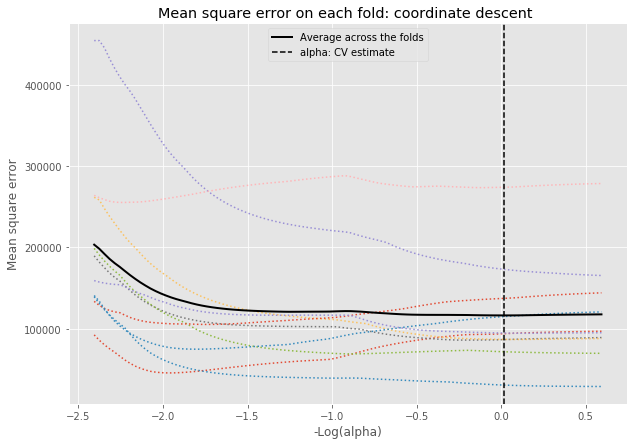

In [5]:
# Lasso CV
las_cv = linear_model.LassoCV(cv=10, random_state=117, fit_intercept=True).fit(np.array(df_x), np.array(df_y))
    
# Calculate negative log alpha
neg_log_alphas_las_cv = -np.log10(las_cv.alphas_)

# Set up plot size
plt.subplots(figsize=(10,7))

# Plot cv mse results of every fold
plt.plot(neg_log_alphas_las_cv, las_cv.mse_path_, ':')
# Plot mean mse of all folds
plt.plot(neg_log_alphas_las_cv, las_cv.mse_path_.mean(axis=-1), 'k',
        label='Average across the folds', linewidth=2)
# Add optimum alpha vertical line
plt.axvline(-np.log10(las_cv.alpha_), linestyle='--', color='k',
                label='alpha: CV estimate')

# Add legend and set labels and titles
plt.legend()
plt.xlabel('-Log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent ')
plt.axis('tight')

### The optimum alpha using 10-fold CV of Lasso regression is printed out below. The number of predictors still inside the model of optimum $\alpha$ and corresponding predictor names are also shown below.

In [6]:
# Print out best results by Lasso CV
print('\nUsing 10-fold Lasso CV, the best alpha =', las_cv.alpha_)

# Generate a boolean filter list to print out predictors with non-zero coefficents
best_alpha_filter = [x!=0 for x in las_cv.coef_]
print('\nFor best alpha, there are', sum(best_alpha_filter), 'predictors left in the model:\n',
        list(compress(pred_names, best_alpha_filter)))


Using 10-fold Lasso CV, the best alpha = 0.9611207059719769

For best alpha, there are 15 predictors left in the model:
 ['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists', 'Errors']




### 1.2 Ridge Regression

### Using the code cell below, Ridge regression using a list of regularization penaly $\alpha$ is performed. The trajectory plot of coefficients versus $\log_{10} \alpha$ is shown below.

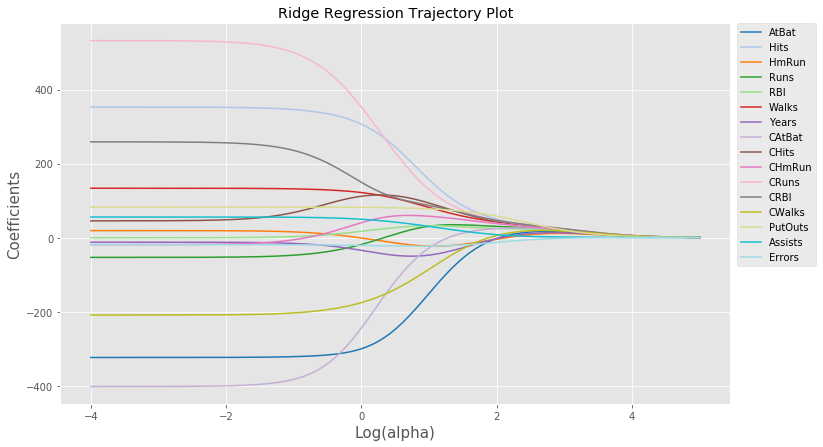

In [7]:
# Compute paths of Ridge regression 
# Generate a list of regularization penalty alpha
n_alphas = 200
alphas_ridge = np.logspace(-4, 5, n_alphas)

# Initialize a list to collect coefficients
coefs_ridge = []

# Iterate through all alphas
for a in alphas_ridge:
    # Perform ridge regression using current alpha and record the result
    ridge = linear_model.Ridge(alpha=a, fit_intercept=False)
    ridge.fit(np.array(df_x), np.array(df_y))
    coefs_ridge.append(list(ridge.coef_))

# Convert the list of coefficients to an array for plot
coefs_ridge = np.array(coefs_ridge)

# Set up basic parameters of Ridge regression trajectory plot
plt.subplots(figsize=(12,7))

# Initialize a empty line list and a column name list
ridge_lines = []

# Iterate through all predictors' coefficients for plotting
for i in range(len(coefs_ridge[0,:])):
    coefs_r = coefs_ridge[:, i]
    line = plt.plot(np.log10(alphas_ridge), coefs_r, c = colors[i], label = pred_names[i])
    lines.append(line)

# Set up plot labels and title
plt.xlabel('Log(alpha)', fontsize = 15)
plt.ylabel('Coefficients', fontsize = 15)
plt.title('Ridge Regression Trajectory Plot')
    
# Place a legend to the right of this smaller subplot.
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

### In the code cell below, 10-fold CV of Ridge regression is performed. Using the 10-fold cross-validation, the best regularization penaly $\alpha$ is print out below.

In [8]:
# Ridge regression 10-fold CV
ridge_cv = linear_model.RidgeCV(alphas = alphas_ridge, cv=10,  
                                fit_intercept=True).fit(np.array(df_x), np.array(df_y))

# Print out best results by Ridge regression CV
print('\nUsing 10-fold Ridge CV, the best alpha =', ridge_cv.alpha_)


Using 10-fold Ridge CV, the best alpha = 238.16855519761606




## Problem 2

The bias and variance can be viewed as two different types of error of prediction models. When a simple model miss a lot of important characteristics of training data, the model tends to have high bias and under-fitting problem. For a complicated model that fits the training data perfectly, it will have low bias but high varaince and thus over-fitting problem. In the usual case, when the model complexity increases, bias decreases but variance increases at the same time. In this case, bias and variance have trade-off relationship. That is, we can trade-off some bias for variance performance or vice versa by adjusting model complexity.

Regulariztion (called shrinkage in some literature) method can control the bias-varaince trade-off by shrinking coefficients of traditional least-squares linear regresion towards zero. During the process of shrinking coefficients toward zero, the variance of model becomes lower but the bias becomes higher at the same time. Thus, regularization controls how much bias we use to trade-off for lower variance or vice versa.

In the trajectory plot of Lasso regression coefficients versus regularization penalty $\alpha$, when $\alpha$ increases, we can see coefficients are shrunken toward zero sequentially. During this process, the variance of Lasso regression model becomes lower while bias becomes higher. Same observation is also found in the plot of MSE versus $-log_{10} \alpha$, when we use large penalty $\alpha$, we have large MSE, which means large bias and low variance. When $\alpha$ becomes smaller, the MSE becomes lower, which mean lower bias. 
For Ridge regression, the bias-variance trade-off process is similiar. In the trajectory plot, when penaly $\alpha$ increases, the model variance becomes lower but bias becomes higher. The only difference between Lasso and Ridge regression is that Ridge regression shrinks all coefficients toward zero at the same time.